In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Utils
import src.utils.visualization.gantt_diagram as gantt

from src.utils.initialization.gen_deadlines import add_groupwise_lognormal_deadlines_by_group_mean, ensure_reasonable_deadlines
from src.utils.analysis_basics.check_gen_deadlines import plotfig_empirical_flow_budget_distributions

# Simulation
from src.simulation.ProductionSimulation import ProductionSimulation

# Database and Collections
from src.classes.Query import RoutingQuery, JobQuery  # for database access
#from src.domain.Initializer import ExperimentInitializer

from src.classes.Collection import JobMixCollection, RoutingCollection               # for simulation and processing

pd.set_option('display.min_rows', 21)
pd.set_option('display.max_rows', 25)


# I. Deadlines

In [3]:
routings = RoutingQuery.get_by_source_name(source_name="Fisher and Thompson 10x10")


In [6]:
df_routing_operations = RoutingCollection(routings).to_dataframe()
df_routing_operations

,Routing_ID,Operation,Machine,Processing Time
0,01-00,0,M01-00,29
1,01-00,1,M01-01,78
2,01-00,2,M01-02,9
3,01-00,3,M01-03,36
4,01-00,4,M01-04,49
5,01-00,5,M01-05,11
6,01-00,6,M01-06,62
7,01-00,7,M01-07,56
8,01-00,8,M01-08,44
9,01-00,9,M01-09,21


In [3]:
experiment = ExperimentInitializer.add_experiment(total_shift_number=360, max_bottleneck_utilization=1.0)
experiment_id = experiment.id
experiment

Experiment(id=4, total_shift_number=360, main_pct=0.5, w_t=10, w_e=2, w_first=1, max_bottleneck_utilization=1.0, sim_sigma=0.25)

In [4]:
ExperimentInitializer.insert_jobs(
    routings=routings,
    experiment=experiment
)

jobs = JobQuery.get_by_experiment_id(experiment_id=experiment_id)
job_problem_collection = JobMixCollection(jobs)
job_problem_collection.to_dataframe()

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline
0,J004-0000,7,0,M02,None,31,None,1440,None
1,J004-0000,7,1,M00,None,86,None,1440,None
2,J004-0000,7,2,M01,None,46,None,1440,None
3,J004-0000,7,3,M05,None,74,None,1440,None
4,J004-0000,7,4,M04,None,32,None,1440,None
5,J004-0000,7,5,M06,None,88,None,1440,None
6,J004-0000,7,6,M08,None,19,None,1440,None
7,J004-0000,7,7,M09,None,48,None,1440,None
8,J004-0000,7,8,M07,None,36,None,1440,None
9,J004-0000,7,9,M03,None,79,None,1440,None


In [10]:
from decimal import Decimal

jobs = JobQuery.get_by_max_bottleneck_utilization(Decimal.from_float(0.75))

for job in jobs[:3]:
    print(job)
    for operation in job.operations:
        print(f" {operation}")


Job(id='01-07500-0000', routing_id='01-07', arrival=0, earliest_start=1440, deadline=None, sum_duration=539, max_bottleneck_utilization=Decimal('0.7500'))
 JobOperation(job_id='01-07500-0000', position_number=0, machine_name='M01-02', duration=31)
 JobOperation(job_id='01-07500-0000', position_number=1, machine_name='M01-00', duration=86)
 JobOperation(job_id='01-07500-0000', position_number=2, machine_name='M01-01', duration=46)
 JobOperation(job_id='01-07500-0000', position_number=3, machine_name='M01-05', duration=74)
 JobOperation(job_id='01-07500-0000', position_number=4, machine_name='M01-04', duration=32)
 JobOperation(job_id='01-07500-0000', position_number=5, machine_name='M01-06', duration=88)
 JobOperation(job_id='01-07500-0000', position_number=6, machine_name='M01-08', duration=19)
 JobOperation(job_id='01-07500-0000', position_number=7, machine_name='M01-09', duration=48)
 JobOperation(job_id='01-07500-0000', position_number=8, machine_name='M01-07', duration=36)
 JobOper

In [11]:
JobMixCollection(jobs).to_dataframe()

AttributeError: 'Job' object has no attribute 'experiment_id'

In [6]:
for job in list(job_problem_collection.values())[:5]:
    print(job)
    for operation in job.operations:
        print(f"\t {operation}")

JobTemplate(id='J004-0000', routing_id='7', experiment_id=4, arrival=0, deadline=None, operations=[JobOperation(job_id='J004-0000', position_number=0, machine='M02', duration=31), JobOperation(job_id='J004-0000', position_number=1, machine='M00', duration=86), JobOperation(job_id='J004-0000', position_number=2, machine='M01', duration=46), JobOperation(job_id='J004-0000', position_number=3, machine='M05', duration=74), JobOperation(job_id='J004-0000', position_number=4, machine='M04', duration=32), JobOperation(job_id='J004-0000', position_number=5, machine='M06', duration=88), JobOperation(job_id='J004-0000', position_number=6, machine='M08', duration=19), JobOperation(job_id='J004-0000', position_number=7, machine='M09', duration=48), JobOperation(job_id='J004-0000', position_number=8, machine='M07', duration=36), JobOperation(job_id='J004-0000', position_number=9, machine='M03', duration=79)])
	 JobOperation(job_id='J004-0000', position_number=0, machine='M02', duration=31)
	 JobOpe

## A) Simulation

In [7]:
simulation = ProductionSimulation(with_earliest_start=True, sigma = 0, verbose = False)
simulation.run(job_problem_collection, start_time = 0, end_time = None)

In [8]:
finished_operations = simulation.get_finished_operation_collection()
df_fcfs = finished_operations.to_dataframe()
df_fcfs


,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline
0,J004-0000,7,0,M02,1440.0,31.0,1471.0,1440,None
1,J004-0000,7,1,M00,1707.0,86.0,1793.0,1440,None
2,J004-0000,7,2,M01,2183.0,46.0,2229.0,1440,None
3,J004-0000,7,3,M05,2229.0,74.0,2303.0,1440,None
4,J004-0000,7,4,M04,2337.0,32.0,2369.0,1440,None
5,J004-0000,7,5,M06,2370.0,88.0,2458.0,1440,None
6,J004-0000,7,6,M08,2514.0,19.0,2533.0,1440,None
7,J004-0000,7,7,M09,2590.0,48.0,2638.0,1440,None
8,J004-0000,7,8,M07,2708.0,36.0,2744.0,1440,None
9,J004-0000,7,9,M03,2744.0,79.0,2823.0,1440,None


In [9]:
#if day_count <= 5:
#    gantt.get_plot(df_fcfs_execution, perspective="Machine")

In [10]:
df_jobs_times_temp = finished_operations.to_last_ops_dataframe()
df_jobs_times_temp


,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline,Total Processing Time
2,J004-0001,6,9,M04,2233.0,55.0,2288.0,1440,None,416.0
6,J004-0005,2,9,M04,2382.0,33.0,2415.0,1440,None,568.0
14,J004-0010,6,9,M04,2428.0,55.0,2483.0,1440,None,416.0
4,J004-0003,5,9,M07,2627.0,25.0,2652.0,1440,None,496.0
0,J004-0000,7,9,M03,2744.0,79.0,2823.0,1440,None,539.0
3,J004-0006,0,9,M09,2752.0,21.0,2773.0,1440,None,395.0
10,J004-0007,3,9,M05,2808.0,43.0,2851.0,1440,None,655.0
1,J004-0002,1,9,M08,2865.0,30.0,2895.0,1440,None,510.0
5,J004-0004,4,9,M06,2877.0,53.0,2930.0,1440,None,393.0
7,J004-0013,4,9,M06,2993.0,53.0,3046.0,1440,None,393.0


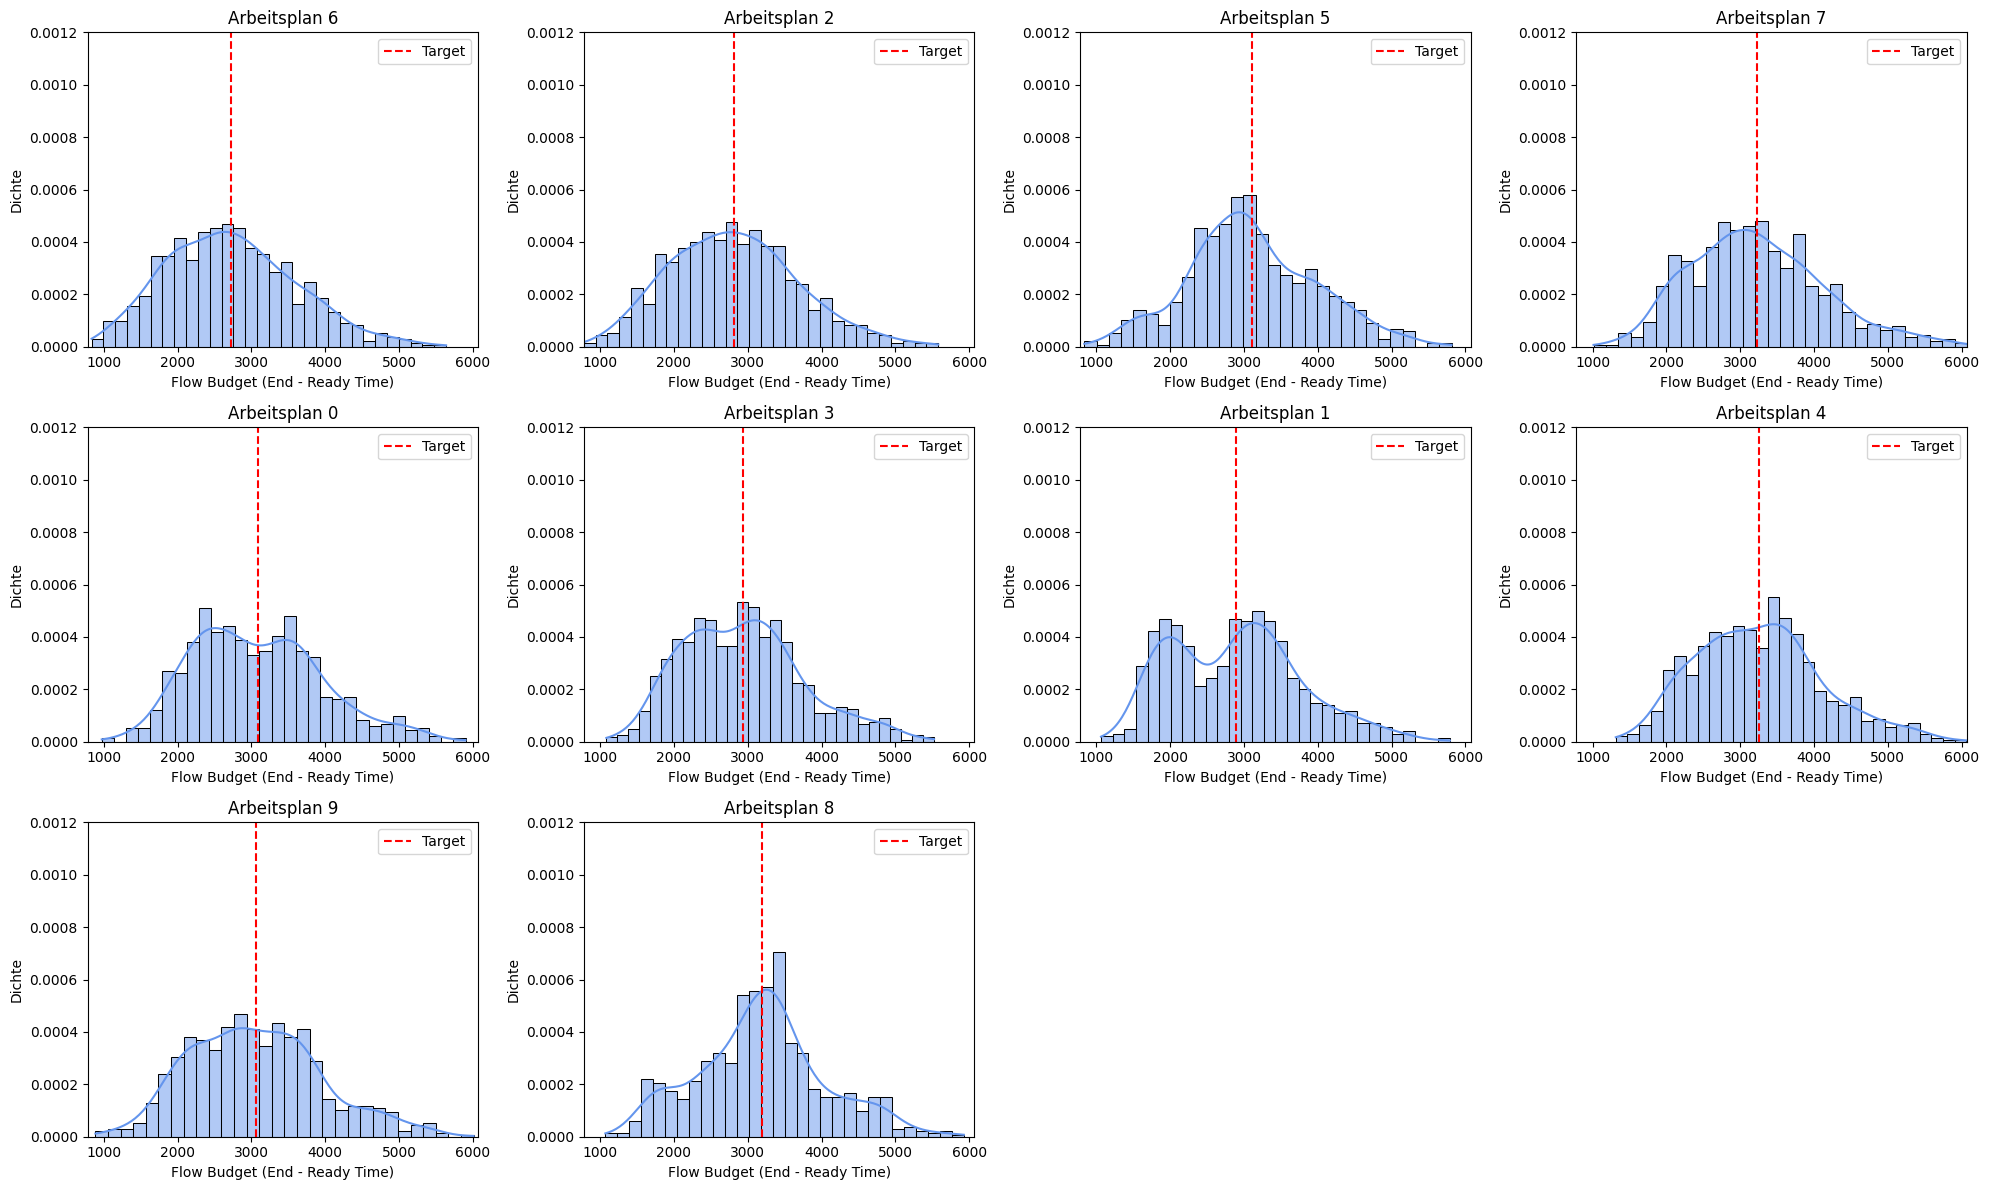

In [11]:
plotfig_empirical_flow_budget_distributions(df_jobs_times_temp, deadline_column="End", y_max=0.0012)
plt.show()

## B) Generation of deadlines using log-normal distribution

In [12]:
df_jobs_times = add_groupwise_lognormal_deadlines_by_group_mean(df_jobs_times_temp, sigma=0.25)
df_jobs_times

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline,Total Processing Time
2,J004-0001,6,9,M04,2233.0,55.0,2288.0,1440,3671.0,416.0
6,J004-0005,2,9,M04,2382.0,33.0,2415.0,1440,3877.0,568.0
14,J004-0010,6,9,M04,2428.0,55.0,2483.0,1440,4810.0,416.0
4,J004-0003,5,9,M07,2627.0,25.0,2652.0,1440,4011.0,496.0
0,J004-0000,7,9,M03,2744.0,79.0,2823.0,1440,4620.0,539.0
3,J004-0006,0,9,M09,2752.0,21.0,2773.0,1440,4824.0,395.0
10,J004-0007,3,9,M05,2808.0,43.0,2851.0,1440,3346.0,655.0
1,J004-0002,1,9,M08,2865.0,30.0,2895.0,1440,4381.0,510.0
5,J004-0004,4,9,M06,2877.0,53.0,2930.0,1440,5145.0,393.0
7,J004-0013,4,9,M06,2993.0,53.0,3046.0,1440,5554.0,393.0


####  Plot of the new deadlines

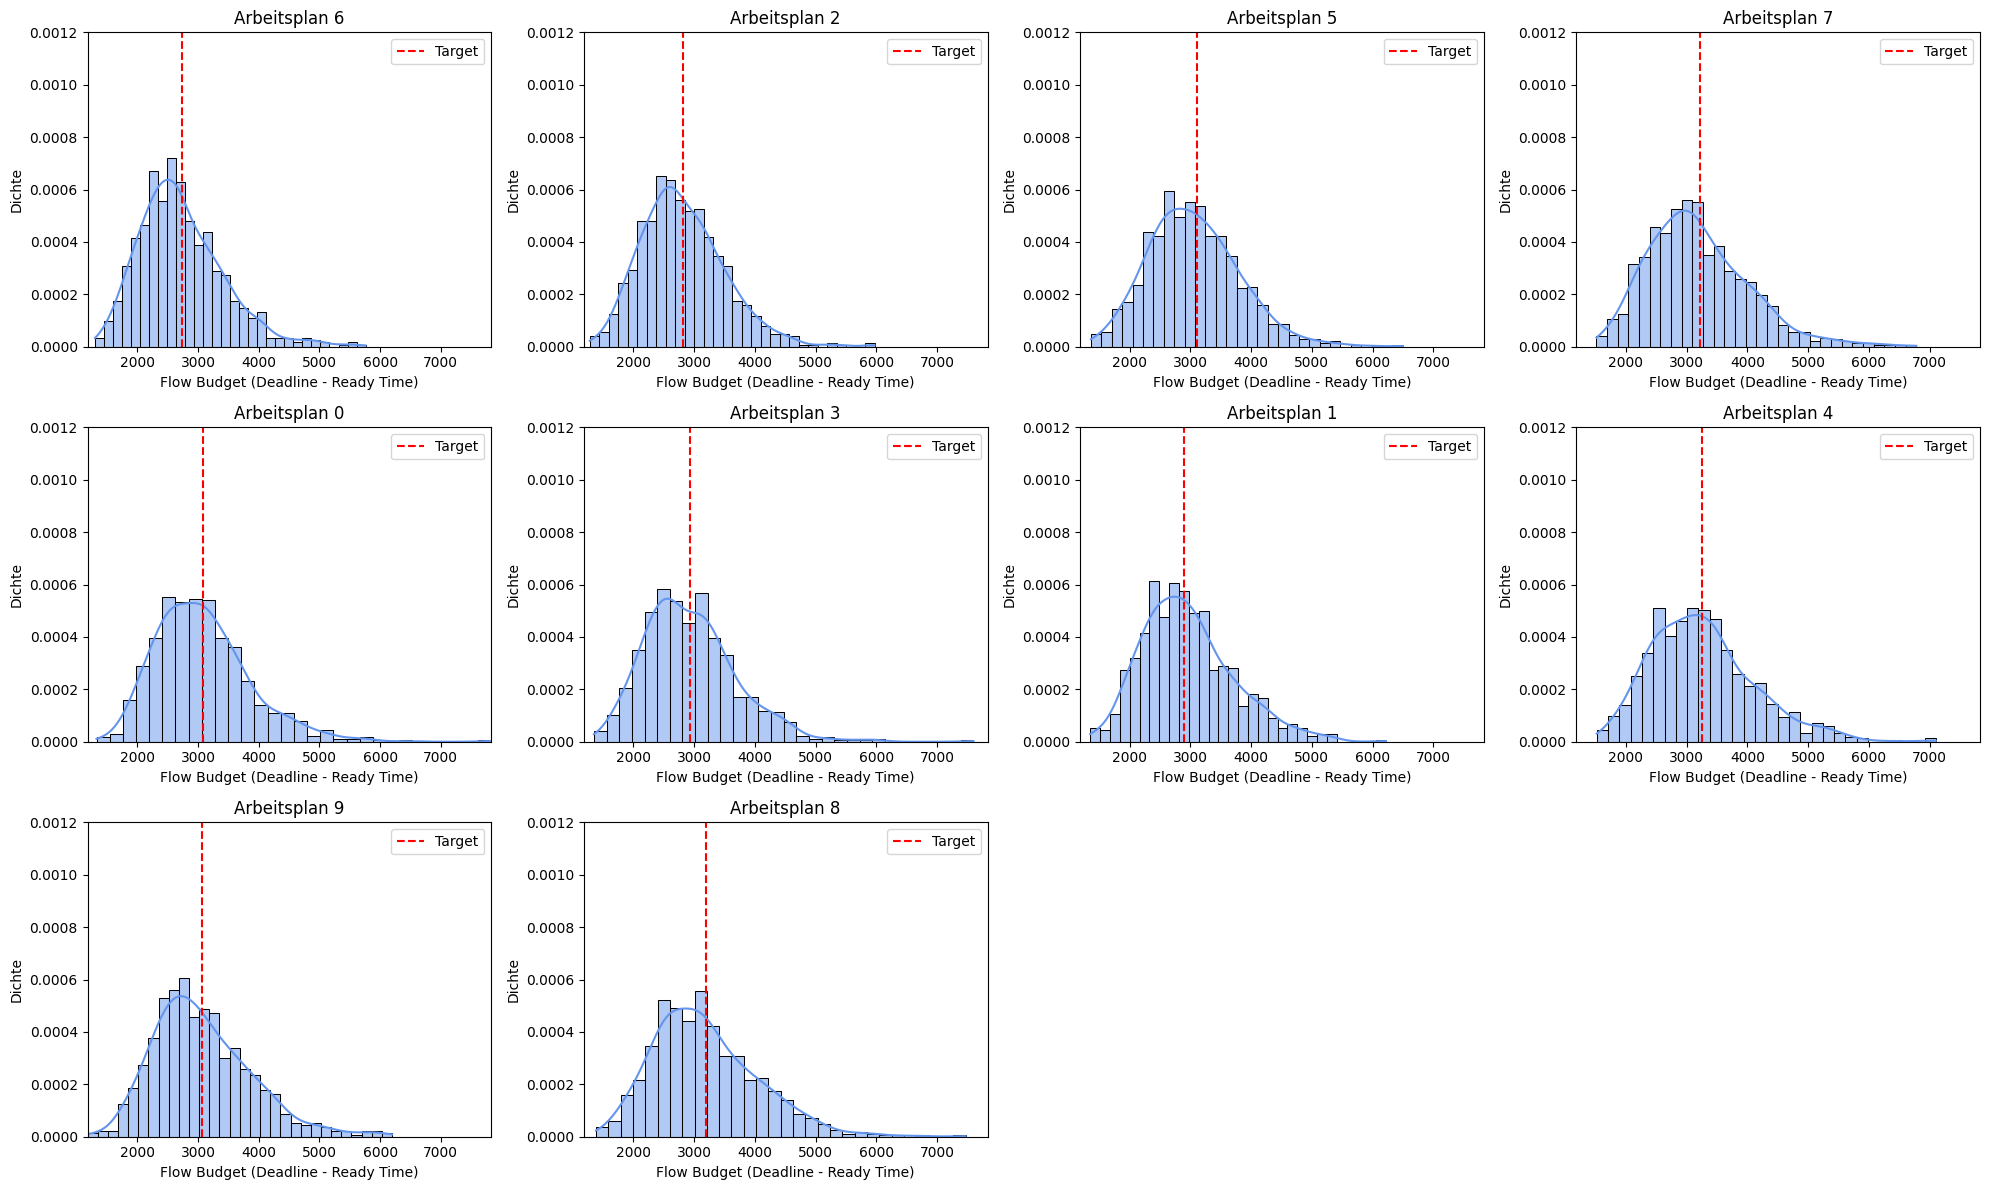

In [13]:
plotfig_empirical_flow_budget_distributions(df_jobs_times, y_max=0.0012)
plt.show()

#### Ensuring that the processing time is achievable to a certain extent in the best-case scenario

In [14]:
# min. 100 % of processing time for each job is covered in best-case
df_jobs_times_final = ensure_reasonable_deadlines(df_jobs_times, min_coverage = 1.0)

diff_count = (df_jobs_times_final["Deadline"] != df_jobs_times["Deadline"]).sum()

# Info: Compare the "Deadline" column
print(f"Number of different entries in 'Deadline': {diff_count}")

df_jobs_times_final

Number of different entries in 'Deadline': 0


,Job,Routing_ID,Operation,Machine,Start,Processing Time,Ready Time,Deadline,Total Processing Time
2,J004-0001,6,9,M04,2233.0,55.0,1440,3671,416.0
6,J004-0005,2,9,M04,2382.0,33.0,1440,3877,568.0
14,J004-0010,6,9,M04,2428.0,55.0,1440,4810,416.0
4,J004-0003,5,9,M07,2627.0,25.0,1440,4011,496.0
0,J004-0000,7,9,M03,2744.0,79.0,1440,4620,539.0
3,J004-0006,0,9,M09,2752.0,21.0,1440,4824,395.0
10,J004-0007,3,9,M05,2808.0,43.0,1440,3346,655.0
1,J004-0002,1,9,M08,2865.0,30.0,1440,4381,510.0
5,J004-0004,4,9,M06,2877.0,53.0,1440,5145,393.0
7,J004-0013,4,9,M06,2993.0,53.0,1440,5554,393.0


## C) Update DB

In [15]:
JobQuery.update_job_deadlines_from_df(
    df = df_jobs_times_final,
    job_column="Job",
    deadline_column = "Deadline"
)

In [16]:
jobs = JobQuery.get_by_experiment_id(experiment_id=experiment_id)
JobMixCollection(jobs).to_dataframe()

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline
0,J004-0000,7,0,M02,None,31,None,1440,4620
1,J004-0000,7,1,M00,None,86,None,1440,4620
2,J004-0000,7,2,M01,None,46,None,1440,4620
3,J004-0000,7,3,M05,None,74,None,1440,4620
4,J004-0000,7,4,M04,None,32,None,1440,4620
5,J004-0000,7,5,M06,None,88,None,1440,4620
6,J004-0000,7,6,M08,None,19,None,1440,4620
7,J004-0000,7,7,M09,None,48,None,1440,4620
8,J004-0000,7,8,M07,None,36,None,1440,4620
9,J004-0000,7,9,M03,None,79,None,1440,4620


# II. Transition Time

In [20]:
df_fcfs

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline
0,J004-0000,7,0,M02,1440.0,31.0,1471.0,1440,None
1,J004-0000,7,1,M00,1707.0,86.0,1793.0,1440,None
2,J004-0000,7,2,M01,2183.0,46.0,2229.0,1440,None
3,J004-0000,7,3,M05,2229.0,74.0,2303.0,1440,None
4,J004-0000,7,4,M04,2337.0,32.0,2369.0,1440,None
5,J004-0000,7,5,M06,2370.0,88.0,2458.0,1440,None
6,J004-0000,7,6,M08,2514.0,19.0,2533.0,1440,None
7,J004-0000,7,7,M09,2590.0,48.0,2638.0,1440,None
8,J004-0000,7,8,M07,2708.0,36.0,2744.0,1440,None
9,J004-0000,7,9,M03,2744.0,79.0,2823.0,1440,None


In [19]:
def compute_transition_times_backward(
    df_schedule: pd.DataFrame, job_column:str = "Job", position_number_column: str = "Operation",
    start_column: str = "Start", end_column: str = "End", new_transition_column: str = "Transition_Time"):
    """
    Vektorisierte Berechnung der Übergangszeiten bei Rückwärtsterminierung.
    Deutlich schneller als die Schleifenvariante.
    
    Erwartet: ['Job', 'Operation', 'Start', 'End']
    """
    df = df_schedule.copy()
    df = df.sort_values([job_column, position_number_column], ascending=[True, False])

    df['End_Previous_Op'] = df.groupby(job_column)[end_column].shift(-1)

    # Übergangszeit: Start dieser Op – Ende der vorheruíger Operation
    df[new_transition_column] = df[start_column] - df['End_Previous_Op']

    #df.drop(columns=''End_Previous_Op', inplace=True)
    return df

df_jobs_transition_times = compute_transition_times_backward(df_fcfs)
df_jobs_transition_times     

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline,End_Previous_Op,Transition_Time
9,J004-0000,7,9,M03,2744.0,79.0,2823.0,1440,None,2744.0,0.0
8,J004-0000,7,8,M07,2708.0,36.0,2744.0,1440,None,2638.0,70.0
7,J004-0000,7,7,M09,2590.0,48.0,2638.0,1440,None,2533.0,57.0
6,J004-0000,7,6,M08,2514.0,19.0,2533.0,1440,None,2458.0,56.0
5,J004-0000,7,5,M06,2370.0,88.0,2458.0,1440,None,2369.0,1.0
4,J004-0000,7,4,M04,2337.0,32.0,2369.0,1440,None,2303.0,34.0
3,J004-0000,7,3,M05,2229.0,74.0,2303.0,1440,None,2229.0,0.0
2,J004-0000,7,2,M01,2183.0,46.0,2229.0,1440,None,1793.0,390.0
1,J004-0000,7,1,M00,1707.0,86.0,1793.0,1440,None,1471.0,236.0
0,J004-0000,7,0,M02,1440.0,31.0,1471.0,1440,None,NaN,NaN


In [21]:
df_avg_transition_times = (
    df_jobs_transition_times
    .groupby('Machine')['Transition_Time']
    .mean()
    .reset_index()
    .rename(columns={'Transition_Time': 'Avg_Transition_Time'})
)
df_avg_transition_times

,Machine,Avg_Transition_Time
0,M00,255.022500
1,M01,645.055146
2,M02,232.321849
3,M03,1029.343750
4,M04,123.537771
5,M05,95.531865
6,M06,67.663755
7,M07,94.758612
8,M08,98.446850
9,M09,29.434670


In [ ]:
-

## Update DB

In [ ]:
RoutingQuery.update_operations_with_theoretical_transition_times_from_dataframe(df_avg_transitions)

### ____________________________________________________________________________________

In [ ]:
df_max_transition_per_routing = (
    df_avg_transitions
    .groupby("Routing_ID")["Avg_Transition_Time"]
    .max()
    .reset_index()
    .rename(columns={"Avg_Transition_Time": "Max_Avg_Transition_Time"})
)
df_max_transition_per_routing